# A3

Deadline - 12 May, 2022 (11:59 PM)

Your task is to use community detection algorithms to identify communities in a social network graph of Facebook users’ friend lists.

## Question 1
Start with the ‘Karate Club’ dataset which was composed by asking 33 children who were all in the same karate club to list their friends. Each edge represents a friendship, and each node represents a child in Karate club. 

Since this is a very small graph, we can play around with it and visualize it to see what’s actually going on as we’re developing our code


In [1]:
import networkx as nx
G = nx.karate_club_graph()

In [2]:
G

In [3]:
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


### [1 pts] Part 1A: Make a visualization of the network (hint: draw()). Title this visualization “Karate Network”.

In [4]:
import matplotlib.pyplot as plt

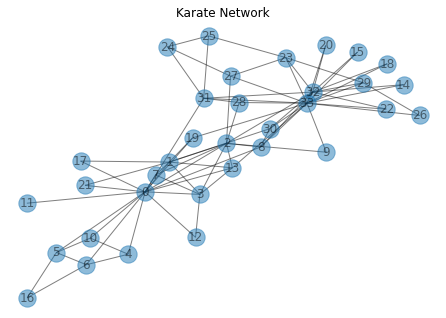

In [5]:
nx.draw(G,with_labels=True, alpha=0.5)
plt.title('Karate Network');

### [2 pts] Part 1B: Using the Louvain method for undirected graphs, find the best partition of the network. How many communities does this method produce? List the size of each community in descending order.

In [6]:
#pip install python-louvain

In [7]:
from community import community_louvain

In [8]:
communities = community_louvain.best_partition(G)

In [9]:
communities # node : community assignment

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 2,
 5: 2,
 6: 2,
 7: 0,
 8: 3,
 9: 3,
 10: 2,
 11: 0,
 12: 0,
 13: 0,
 14: 3,
 15: 3,
 16: 2,
 17: 0,
 18: 3,
 19: 0,
 20: 3,
 21: 0,
 22: 3,
 23: 1,
 24: 1,
 25: 1,
 26: 3,
 27: 1,
 28: 1,
 29: 3,
 30: 3,
 31: 1,
 32: 3,
 33: 3}

In [10]:
import numpy as np

In [11]:
# How many communities does this method produce?
np.unique(list(communities.values()))

array([0, 1, 2, 3])

There are 4 communities produced by the Louvain method for partitioning the network.

In [12]:
from collections import Counter

In [13]:
counts = Counter(communities.values())
counts

Counter({0: 11, 2: 5, 3: 12, 1: 6})

In [14]:
#  List the size of each community in descending order.
counts.most_common() # community label, community size

[(3, 12), (0, 11), (1, 6), (2, 5)]

### [2 pts] Part 1C: Use the Girvan Newman method to split the Karate community into two groups. How big are these two groups? (list in descending order).

In [15]:
from networkx.algorithms.community.centrality import girvan_newman

In [16]:
comms = girvan_newman(G)
node_groups = []
for comm in next(comms):
    node_groups.append(list(comm))
node_groups

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

In [17]:
print(f"The biggest group has {len(node_groups[1])} nodes and the smaller group has {len(node_groups[0])} nodes.")

The biggest group has 19 nodes and the smaller group has 15 nodes.


In [18]:
node_groups.reverse()

In [19]:
node_groups # list in descending order

[[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]]

### [2 pts] Part 1D: Make a visualization of the network, now where the nodes are colored by which community they belong to, according to the Louvain method. Title this visualization "Visualization of Louvain Groups".

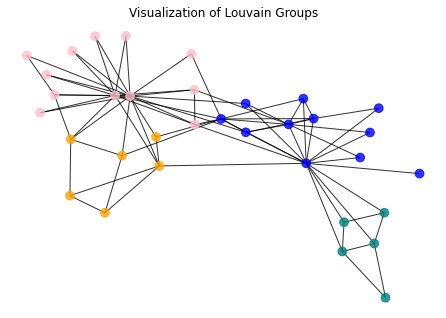

In [20]:
cmap = {
    0 : 'blue',
    1 : 'orange',
    2 : 'teal', 
    3 : 'pink',
}
node_cmap = [cmap[v] for _,v in communities.items()]
nx.draw(G, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.title('Visualization of Louvain Groups');

## Question 2
Download the Facebook data ‘facebook_combined.txt’ (Edges from all egonets combined) from this website: https://snap.stanford.edu/data/ego-Facebook.html

Using the Louvain method for undirected graphs, find the best partition of the network.

In [21]:
edges = []
with open("facebook_combined.txt") as f:
    for line in f:
        (k, v) = line.split()
        edges+=[(int(k),int(v))]
len(edges)

88234

In [22]:
G = nx.Graph()
G.add_edges_from(edges)

### [1 pts] Part 2A: How many communities does this method produce?

In [23]:
coms = community_louvain.best_partition(G)

In [24]:
coms # node : community

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 1,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 2,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [25]:
np.unique(list(coms.values()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [26]:
print(f"This method produces {len(np.unique(list(coms.values())))} communities.")

This method produces 16 communities.


### [2 pts] Part 2B: List the size of each community in descending order.

In [27]:
counts = Counter(coms.values())
counts

Counter({0: 350,
         1: 433,
         2: 435,
         3: 423,
         4: 535,
         5: 321,
         6: 129,
         8: 548,
         9: 73,
         10: 237,
         11: 25,
         12: 60,
         14: 206,
         15: 226,
         13: 19,
         7: 19})

In [28]:
#  List the size of each community in descending order.
counts.most_common() # community, size

[(8, 548),
 (4, 535),
 (2, 435),
 (1, 433),
 (3, 423),
 (0, 350),
 (5, 321),
 (10, 237),
 (15, 226),
 (14, 206),
 (6, 129),
 (9, 73),
 (12, 60),
 (11, 25),
 (13, 19),
 (7, 19)]